# Begging theory

# Calculating return of a single investment
    
Apple's equity
* Bought=1 share                           
* Buying Price= \\$105(USD)
* End of year price= \\$116(USD)

To understand if this investment was worthed or not we have to compare it with other stocks's prices that we didn't buy.

We have to calculate a precentage rate of return of the investment.

# Simple rate of return = (ending price-begging price)/begging price

$$SRT = \frac{116-105}{105}=10.5%$$

* If we have a dividend of \\$2 then we have to do $SRT=\frac{116+2-105}{105}=12.5%$

# Logarithmic rate of return = $log\frac{Ending Price}{Begging Price}= log(Ending Price) - log(Begging Price)$

* Simple rate of return is suggested to be used when we dealing with multiple assets over the same TimeFrame
* Logarithmic rate of return when we make calculations about a single asset over time

# TimeFrame

Investments with different holdings period should not be compared

We will deal with daily,monthly, quartely and yearly(annualy) holding times.

To convert daily,monthly and quartely in annualy we will use:
* $annual return = (daily return +1)^{365}100$
            

## Simple Rate of Return

In [1]:
# Import the liblaries 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [109]:
# I will load the data for the stock price Procter and Gamble
PG=yf.download('PG',start='1995-1-1')
# I will see the first 5 rows
PG.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,6.320252,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,6.269589,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,6.180927,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,6.193593,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,6.168259,1795200


In [110]:
# I will see the last 5 rows
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,117.089996,117.199997,115.000000,115.769997,115.769997,5636000
2020-05-05,115.800003,117.260002,115.209999,116.010002,116.010002,5425200
2020-05-06,115.540001,116.139999,112.889999,113.099998,113.099998,7892200
2020-05-07,114.059998,114.139999,111.820000,112.169998,112.169998,8762800
2020-05-08,113.519997,116.300003,113.389999,115.949997,115.949997,9279900


We've said that the simple rate of return calculate like (P1-P0)/P0
We will do some calculation and we will form it like (P1/P0)-1

In [3]:
# Because I don't want to import every time the data from yahoo finance I wil save them
PG.to_csv('PG-stock-price.csv')
PG=pd.read_csv('PG-stock-price.csv',index_col=0)
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,6.320252,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,6.269589,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,6.180927,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,6.193593,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,6.168259,1795200


In [4]:
# I will calculate the Simple rate of return of the Close price
PG['simple_return']= (PG['Adj Close']/PG['Adj Close'].shift(1))-1 # The shift method will help us to make the divition P1/P0
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-05-04   -0.008988
2020-05-05    0.002073
2020-05-06   -0.025084
2020-05-07   -0.008223
2020-05-08    0.033699
Name: simple_return, Length: 6383, dtype: float64


In [5]:
# Because we'll like to calculate the SRR for multiple tickers I will function the previous cell
def simple_return(data,Adj_Close="Adj Close",new_column='simple_return'):
    '''
    This function create a new column with the simple rate of return
    * Adj_Close takes a string with the name of Adj Close of the data
    * new_column takes a string with the new name column
    '''
    data[new_column]= (data[Adj_Close]/data[Adj_Close].shift(1))-1
    return data

## Let's plot the simple return

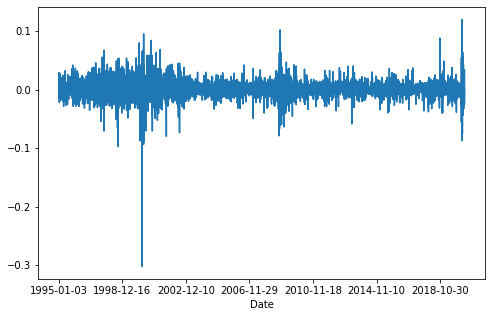

In [6]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

## Average rate of return

Because the buyers want to hold the stock for a long term they focus on the average of return. Hence we have to calculate the average rate of return

In [7]:
# Average rate of return
aver_returns_d=PG['simple_return'].mean()
aver_returns_d

0.0005598827348329495

## Annual average return

Because the number of average return per day doesn't say something we have to calculate the annual average returns. To do that we have to multiply by 250. 250 because the stock market is closed at weekends and day offs.

In [8]:
aver_returns_a=PG['simple_return'].mean()*250
aver_returns_a

0.13997068370823737

In [9]:
# I will prind the average with precendance
print (f'The averege annual return is: {aver_returns_a*100:.3f} %' )

The averege annual return is: 13.997 %


## Log return
$$log=\frac{Pt}{Pt-1}$$

In [10]:
# Let's see the first five rows of the data again
PG.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,6.320252,3318400,NaN
1995-01-04,15.53125,15.65625,15.31250,15.46875,6.269589,2218800,-0.008016
1995-01-05,15.37500,15.43750,15.21875,15.25000,6.180927,2319600,-0.014142
1995-01-06,15.15625,15.40625,15.15625,15.28125,6.193593,3438000,0.002049
1995-01-09,15.34375,15.40625,15.18750,15.21875,6.168259,1795200,-0.004090


In [11]:
# Let's calculate the log returns using numpy log
PG['log_returns']=np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
#Print the new column
PG['log_returns']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-05-04   -0.009029
2020-05-05    0.002071
2020-05-06   -0.025404
2020-05-07   -0.008257
2020-05-08    0.033143
Name: log_returns, Length: 6383, dtype: float64

In [12]:
# Because we'll like to calculate the LRR for multiple tickers I will function the previous cell
def log_return(data,Adj_Close="Adj Close",new_column='simple_return'):
    '''
    This function create a new column with the simple rate of return
    * Adj_Close takes a string with the name of Adj Close of the data
    * new_column takes a string with the new name column
    '''
    data[new_column]= np.log(PG[Adj_Close]/PG[Adj_Close].shift(1))
    return data

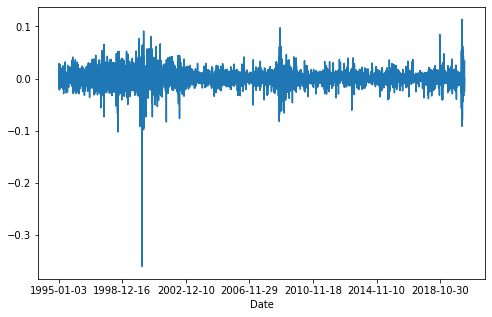

In [13]:
# Let's plot hte data
PG['log_returns'].plot(figsize=(8,5))
plt.show()

In [14]:
# Calculate the average log return
aver_log_d=PG['log_returns'].mean()
aver_log_d

0.00045587589561700304

In [15]:
# Let's calculate the average log annual return
aver_log_a=PG['log_returns'].mean()*250
aver_log_a

0.11396897390425076

In [16]:
#print the precentance
print(f'The averege annual log return is: {aver_log_a*100:.3f} %' )

The averege annual log return is: 11.397 %


### Calculating return of a multiple investment
Calculate rate of returns for a portfolio of stocks

Let's calculate the average return of the prortfolio with the tickers:
* Apple
* IBM
* GE
* FORD

We would like to calcualte the historical returns of the portfolio. And this will tell as the expected rate of return of this portofolio in the future.
To calculate it we have to multiply the simple rate of returns of each stock with the weights they have of the overall portofolio.

* $$Historical\ rate\ of\ return\ =\ rate\ of\ return\ of\ a\ security\ *\ weight\ of\ portfolio$$

E.g.
If we have a equal weighted portfolio each of the 4 stocks obtain 25% of the overall portfolio. Hence, we have to multiply each rate of return with the weights and find the historical weight of return.

### Let's calculate the return for a portfolio of securities

In [53]:
# Let's create a list with the tickers of the stocks
tickers= ['PG','MSFT','F','GE']
#Let's load the data
portfolio=pd.DataFrame()
for i in tickers:
    portfolio[i]=yf.download(i,start='1995-1-1')['Adj Close'] # We need only the Adj Close price
portfolio.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.413537,4.186858,2.729230
1995-01-04,6.269589,2.431082,4.299507,2.729230
1995-01-05,6.180927,2.390982,4.261956,2.735919
1995-01-06,6.193593,2.431082,4.261956,2.722540
1995-01-09,6.168259,2.416045,4.337057,2.695783


In [54]:
# Let's save and load the data
portfolio.to_csv("porfolio.csv")
portfolio=pd.read_csv('porfolio.csv',index_col=0)
portfolio.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.413537,4.186858,2.729230
1995-01-04,6.269589,2.431082,4.299507,2.729230
1995-01-05,6.180927,2.390982,4.261956,2.735919
1995-01-06,6.193593,2.431082,4.261956,2.722540
1995-01-09,6.168259,2.416045,4.337057,2.695783


In [55]:
# Let's see the function info
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6385 entries, 1995-01-03 to 2020-05-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6385 non-null   float64
 1   MSFT    6385 non-null   float64
 2   F       6385 non-null   float64
 3   GE      6385 non-null   float64
dtypes: float64(4)
memory usage: 249.4+ KB


We would like to normalize our data to have the same starting point. Hence:

  ### Normalization to 100:
$$\frac{P_t}{P_0} *100$$
              

In [56]:
# We will use the iloc to obtain the firts element of the porfolio
portfolio.iloc[0]

PG      6.320252
MSFT    2.413537
F       4.186858
GE      2.729230
Name: 1995-01-03, dtype: float64

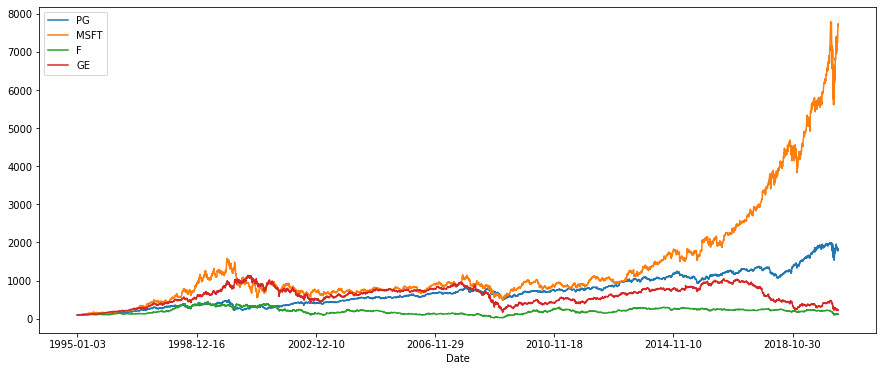

In [57]:
# Let's plot the data with normalization
(portfolio/portfolio.iloc[0]*100).plot(figsize=(15,6));

In [58]:
# Save the plot as a picture
plt.savefig('Normalisation-fig-of-portfolio.png')

<Figure size 432x288 with 0 Axes>

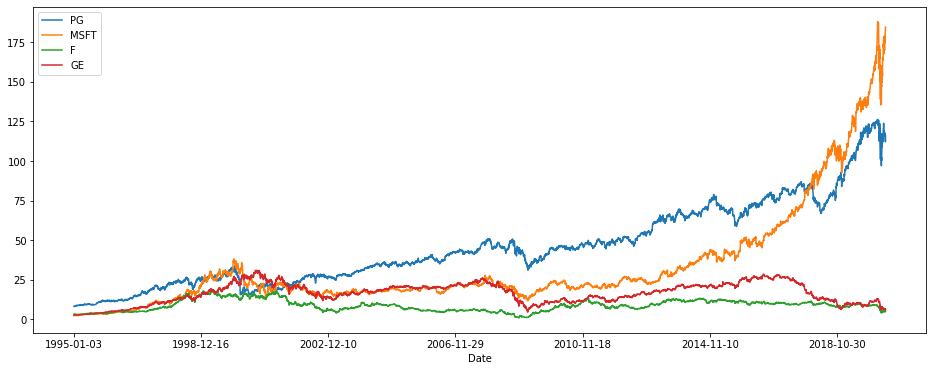

In [22]:
# If we don't do the normalisation the prices would start for a differend point and we couldn't do good prediction
porfolio.plot(figsize=(16,6));

### Calculating the return of a portfolio of Securities

In [59]:
# I will use simple returns because is the better way to calculate multiple stock in the same time period 
returns=(portfolio/portfolio.shift(1))-1
returns

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828
...,...,...,...,...
2020-05-06,-0.025084,0.009847,-0.020121,-0.035484
2020-05-07,-0.008223,0.005807,0.000000,0.021739
2020-05-08,0.033699,0.005882,0.075975,0.029460


In [61]:
# I' ll create a numpy array with the weights of the each stock in the portfolio
# The portfolio is equally weighted so:
weights=np.array([0.25,0.25,0.25,0.25])
# Let's multiply the weights with the return and we will do the dot multiplication because we have matrics
np.dot(returns,weights)

array([        nan,  0.00653965, -0.00922985, ...,  0.03625408,
       -0.00829102, -0.01173574])

It's not so good because we forgot to find the annual return of the return

So, let's do it

In [62]:
annual_returns=returns.mean()*250
np.dot(annual_returns,weights)

0.13171762208959023

In [64]:
# Lets save the average return of the porfolio
portf_1=str(round(np.dot(annual_returns,weights)*100,2)) + '%'
portf_1

'13.17%'

## Compare with another portfolio

The weights of the new portfolio it will be
* 0.4
* 0.4
* 0.15
* 0.05

The sum of the weight have to be all the times 1.

In [65]:
weights_2=np.array([0.4,0.4,0.15,0.05])
portf_2=str(round(np.dot(annual_returns,weights_2)*100,2)) + '%'
print (porf_1)
print (porf_2)

13.17%
15.85%


### Market index

Market index provides an idea how a stock market is performing. It is a good overall proxy of the market's development.

Because it is very difficult to calculate each of the stocks in the stock market practitioners are using market index to understand how a market is performing.

Three known stock indices in US are:

* STANDARD AND POOR'S 500 https://en.wikipedia.org/wiki/S%26P_500_Index
* DOWJONES https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
* NASDAQ https://en.wikipedia.org/wiki/Nasdaq

Other known indices :
* FTSE (UK) https://en.wikipedia.org/wiki/FTSE_100_Index
* DAX 30 (GERMANY) https://en.wikipedia.org/wiki/DAX
* NIKKE (JAPAN) https://en.wikipedia.org/wiki/Nikkei_225

And a Global index (includes stocks for all developed markets in the world):
* MSCI https://en.wikipedia.org/wiki/MSCI_World

### Why to know about stock indices?

Stock indices are an excellent comparator to understand how your own stocks are performing and they indicate what to expect if you invest in a diversified portfolio.

### Let's calculate these indices

In [33]:
# The tickers of the stock indices that I will calculate
tickers=['^GSPC','^IXIC','^GDAXI','^FTSE']
# Because is indices we have to use the simple `^` to make the distinction between indices and stocks
# The tickers are S&P500, NASDAQ, German DAX, London FTSE

# Let's create the DataFrame
ind_data=pd.DataFrame()

# Load the data
for t in tickers:
    ind_data[t]=yf.download(t,start='1997-1-2')['Adj Close']
#The first 5 rows
ind_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [34]:
# Save the data to csv
ind_data.to_csv('stock-indices-price.csv')
#load the data
ind_data=pd.read_csv('stock-indices-price.csv',index_col=0)
# The first 5 rows
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


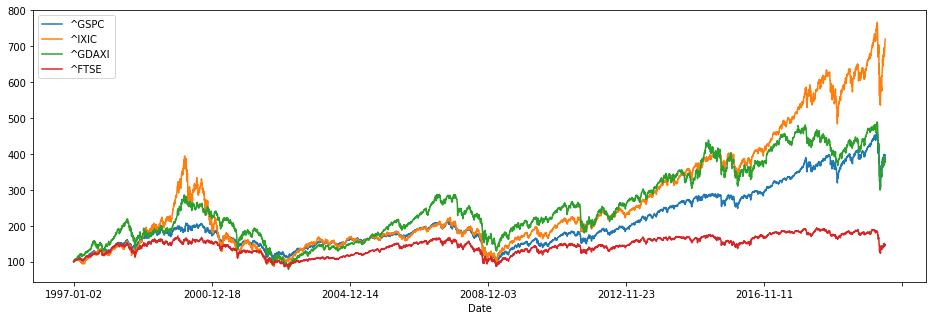

In [35]:
# Let's plot the data with normalization
(ind_data/ind_data.iloc[0]*100).plot(figsize=(16,5))
plt.show()

In [39]:
# Let's calculate the simple return rate 
ind_returns=(ind_data/ind_data.shift(1))-1
#See the first five rows
ind_returns.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,NaN,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049,0.007911
1997-01-06,-0.000508,0.004364,0.009409,0.004157
1997-01-07,0.007463,0.008607,-0.004795,-0.006745
1997-01-08,-0.006399,-0.005558,0.009644,0.002133


In [40]:
# Let's find the mean annual return
ind_returns=ind_returns.mean()*250
#Print 


^GSPC     0.078109
^IXIC     0.115867
^GDAXI    0.071713
^FTSE     0.030681
dtype: float64

### Putting everything together

The last think that we are going to do is to compare P&G stock with S&P500 and DowJones market indices

In [48]:
# Create the tickers
tickers=['PG','^GSPC','^DJI']
# Create the DataFrame
com_data=pd.DataFrame()
# Load the data
for t in tickers:
    com_data[t]=yf.download(t,start='1997-1-1')['Adj Close']
# See the first last rows
com_data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,^GSPC,^DJI
Date,,,
2020-05-06,113.099998,2848.419922,23664.640625
2020-05-07,112.169998,2881.189941,23875.890625
2020-05-08,115.949997,2929.800049,24331.320312
2020-05-11,115.309998,2930.189941,24221.990234
2020-05-12,115.004997,2924.790039,24209.380859


In [49]:
#Let's save the data
com_data.to_csv('P&G500-compares-with-market-indices.csv')
#Let's load the data
com_data=pd.read_csv('P&G500-compares-with-market-indices.csv',index_col=0)
#Let's see the last five rows
com_data.tail()

,PG,^GSPC,^DJI
Date,,,
2020-05-06,113.099998,2848.419922,23664.640625
2020-05-07,112.169998,2881.189941,23875.890625
2020-05-08,115.949997,2929.800049,24331.320312
2020-05-11,115.309998,2930.189941,24221.990234
2020-05-12,115.004997,2924.790039,24209.380859


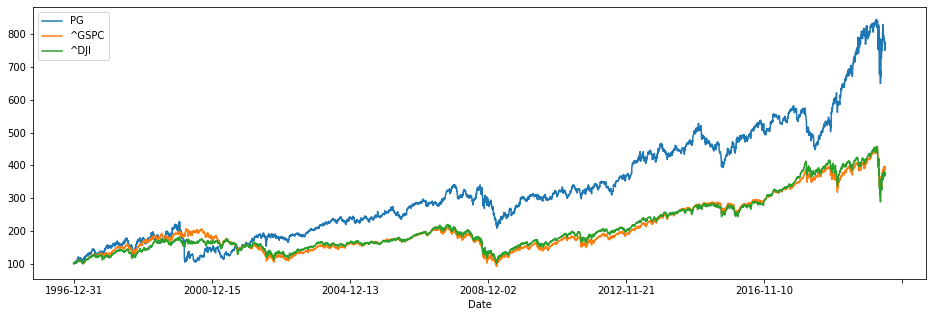

In [50]:
#Let's plot the data with the nomalization method
(com_data/com_data.iloc[0]*100).plot(figsize=(16,5))
plt.show()